In [3]:
import pandas as pd
import os, sys
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.prediction_utils import *

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

random_seed = 42

In [4]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling/experiments/data"
X, y = get_data("bmm", base_dir, sample_rate=1.0)
X.info()

100%|██████████| 72/72 [1:31:39<00:00, 76.38s/it]   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19961856 entries, 0 to 19961855
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   b          int64  
 1   n          int64  
 2   m          int64  
 3   p          int64  
 4   gflops     float64
 5   dtype_16   bool   
 6   dtype_32   bool   
 7   dtype_b16  bool   
dtypes: bool(3), float64(1), int64(4)
memory usage: 818.6 MB


In [5]:
print((y<0).sum())
print(y.isna().sum())

0
5691832


In [6]:
df = pd.concat([X, y], axis=1)
df = df.dropna()
df = df[df["time"] > 0]
X, y = df.drop(columns=["time"]), df["time"]

Train--------
Mean Squared Error: 2.0941211540829134
MAPE: 0.013919308742994683
R-squared: 0.9994843122012931


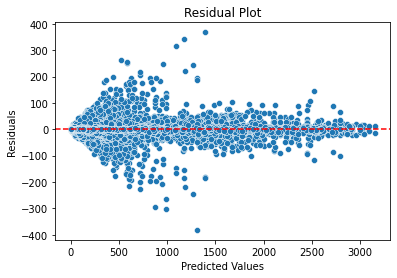

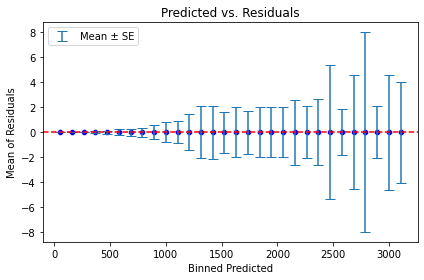

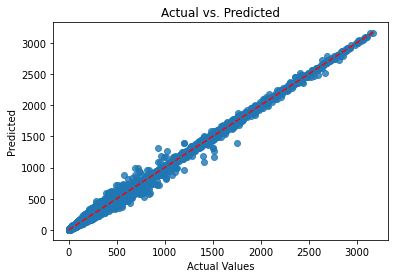

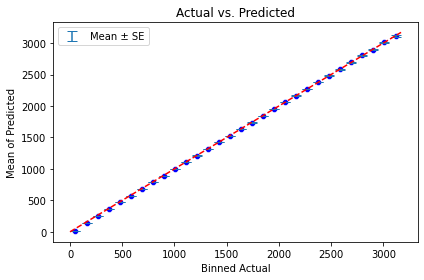

Val--------
Mean Squared Error: 11.709645388474792
MAPE: 0.03572052603010303
R-squared: 0.9971522742232329


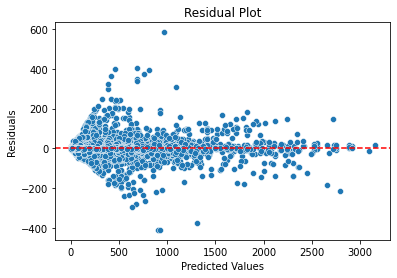

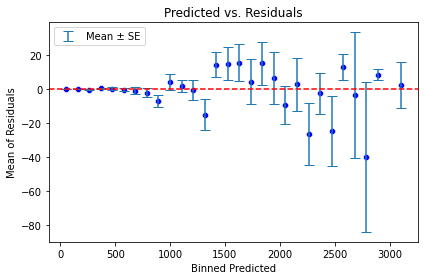

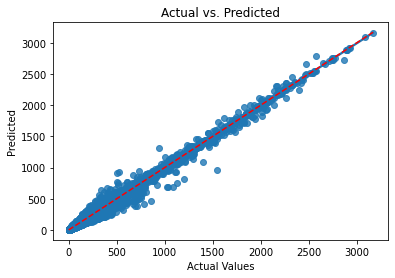

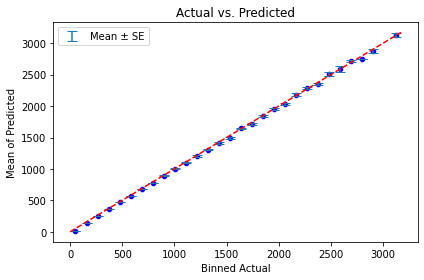

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X, y, return_concat=False)
X_cv = pd.concat([X_train, X_val])
y_cv = pd.concat([y_train, y_val])

tree_model = DecisionTreeRegressor(max_depth=200, min_samples_split=2, min_samples_leaf=2, max_features=10, random_state=random_seed)
tree_model.fit(X_cv, y_cv)

run_val_pipeline(tree_model, X_cv, X_test, y_cv, y_test, bins=30)

In [6]:
get_feature_importance(X.columns, tree_model)

,Feature,Importance
4,gflops,0.654248
6,dtype_32,0.334373
2,m,0.004695
3,p,0.003242
0,b,0.001569
1,n,0.001471
7,dtype_b16,0.000228
5,dtype_16,0.000173


## Random Forest

Train--------
Mean Squared Error: 1.5947059592656405
MAPE: 0.013331853634511075
R-squared: 0.9996077782476301


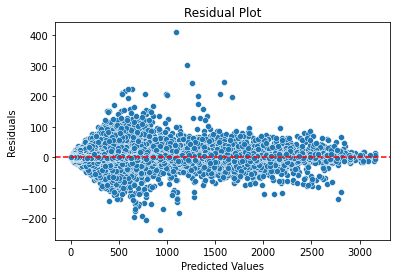

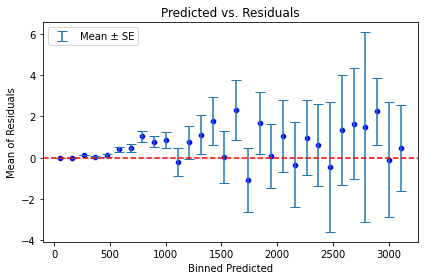

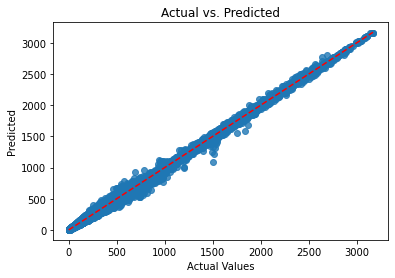

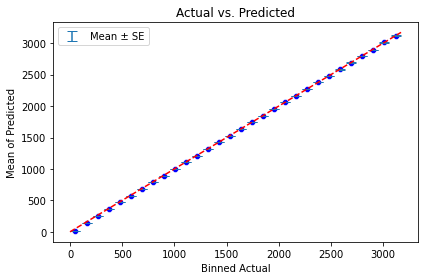

Val--------
Mean Squared Error: 5.4535724311862355
MAPE: 0.024602618168296835
R-squared: 0.9986642424963658


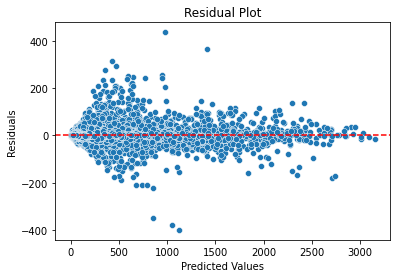

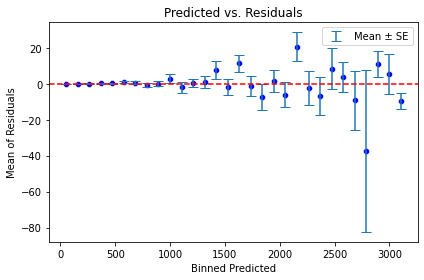

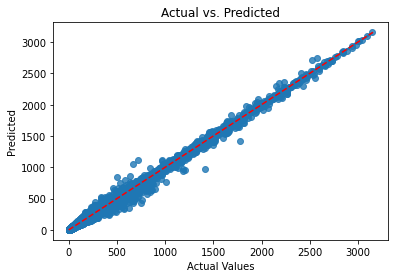

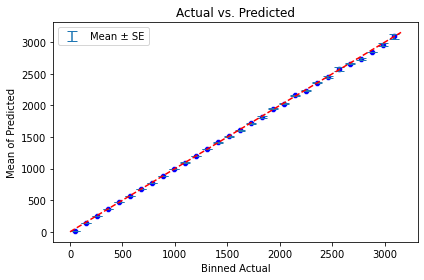

In [7]:
X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X, y, return_concat=False)
X_cv = pd.concat([X_train, X_val])
y_cv = pd.concat([y_train, y_val])

tree_model = RandomForestRegressor(max_depth=200, min_samples_split=2, min_samples_leaf=2, max_features=10, random_state=random_seed)
tree_model.fit(X_cv, y_cv)

run_val_pipeline(tree_model, X_cv, X_test, y_cv, y_test, bins=30)

# Per Dtype

## 32

Train--------
Mean Squared Error: 5.4715343814420905
MAPE: 0.01715135193230111
R-squared: 0.9994995190357457


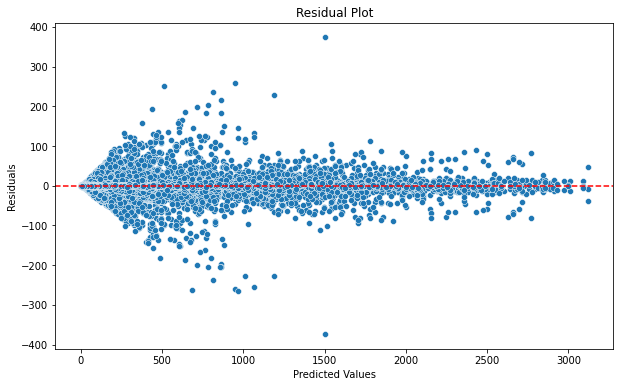

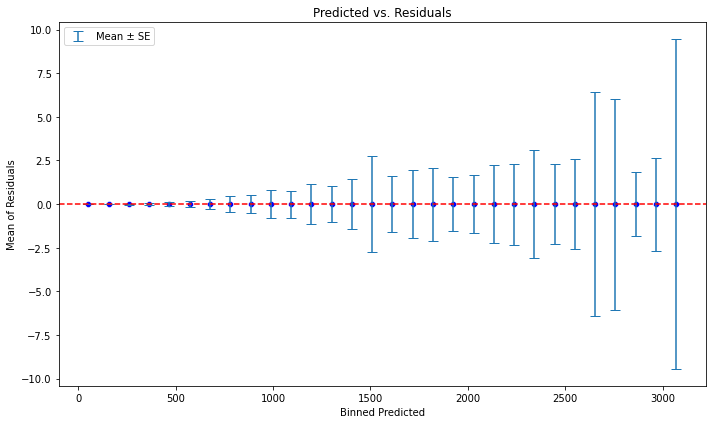

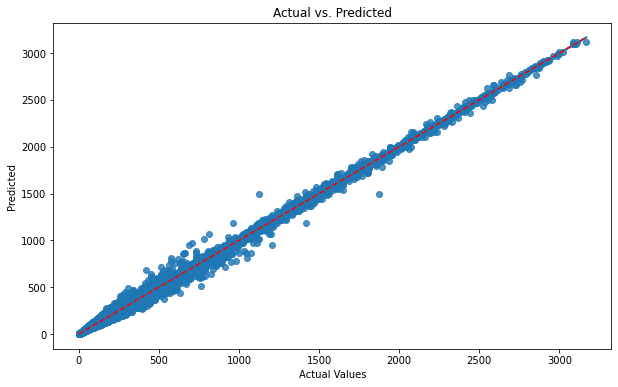

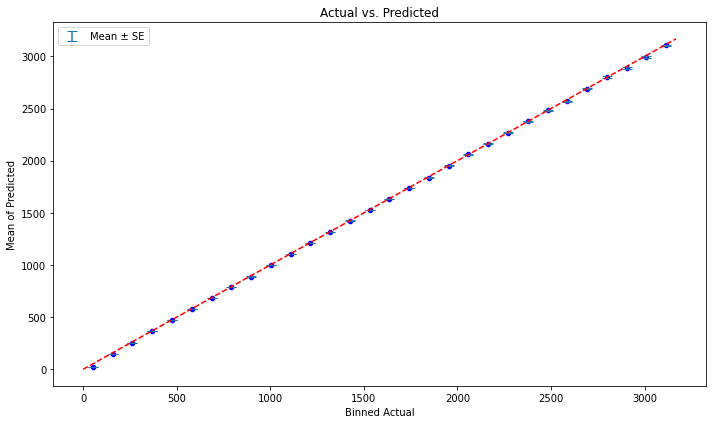

Val--------
Mean Squared Error: 34.0550376743566
MAPE: 0.03382510425885542
R-squared: 0.996942207471912


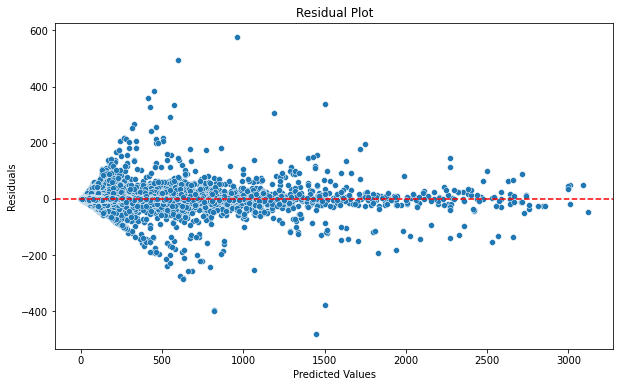

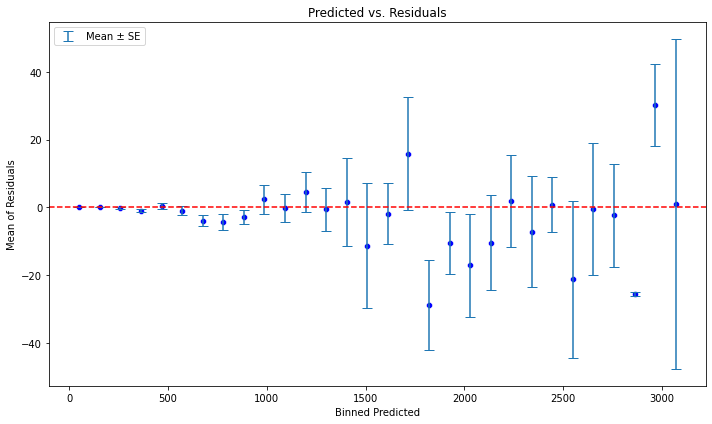

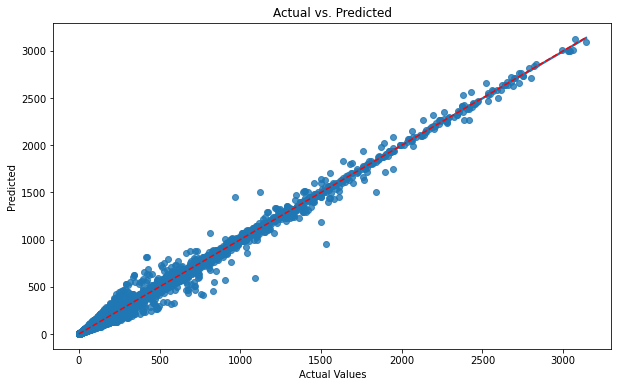

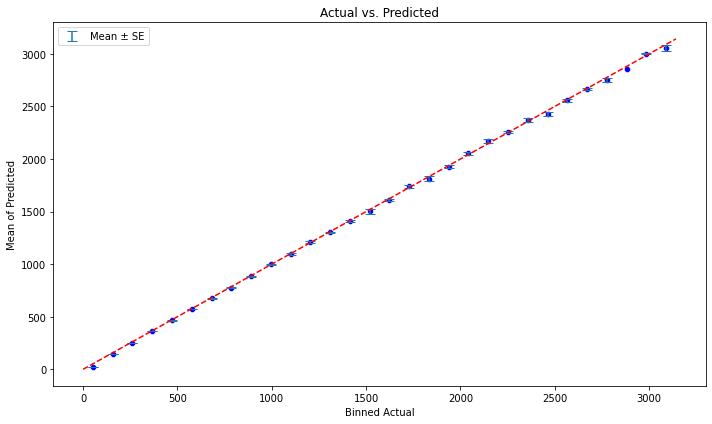

In [10]:
df_dtype = df.query("dtype_32")
X_dtype, y_dtype = df_dtype.drop(columns=["time"]), df_dtype["time"]

X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X_dtype, y_dtype, return_concat=False)
X_cv = pd.concat([X_train, X_val])
y_cv = pd.concat([y_train, y_val])

tree_model = DecisionTreeRegressor(max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=100, random_state=random_seed)
tree_model.fit(X_cv, y_cv)

run_val_pipeline(tree_model, X_cv, X_test, y_cv, y_test, bins=30)

## 16

Train--------
Mean Squared Error: 0.09707032893243638
MAPE: 0.01915764602043436
R-squared: 0.9998511914403972


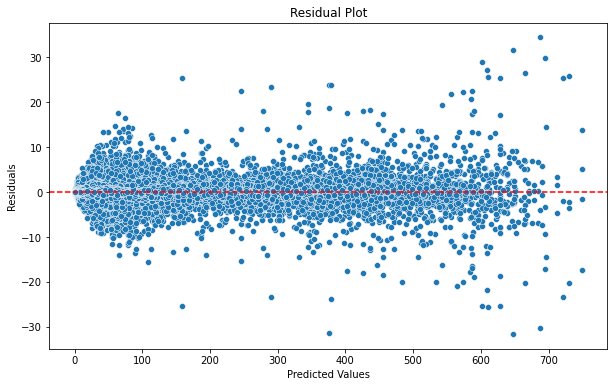

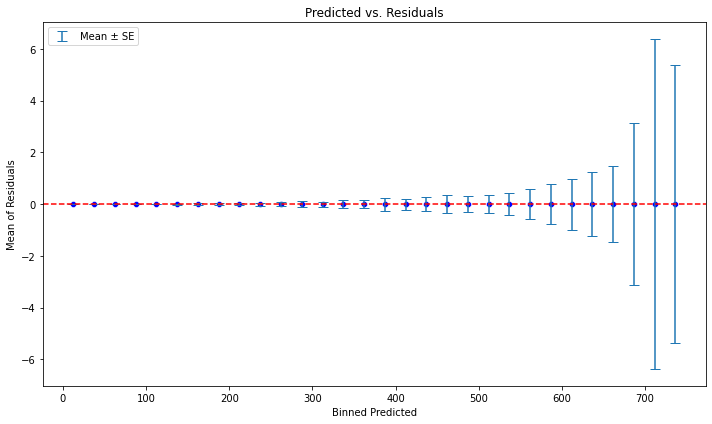

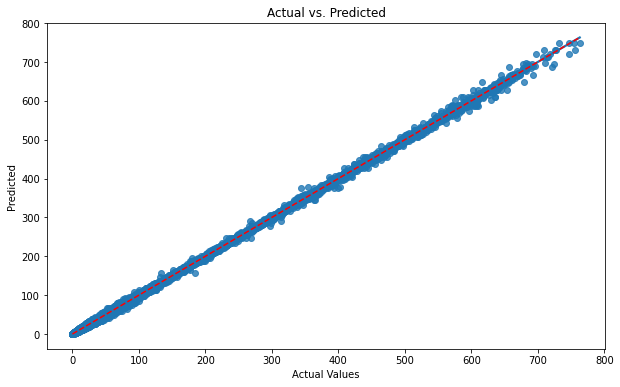

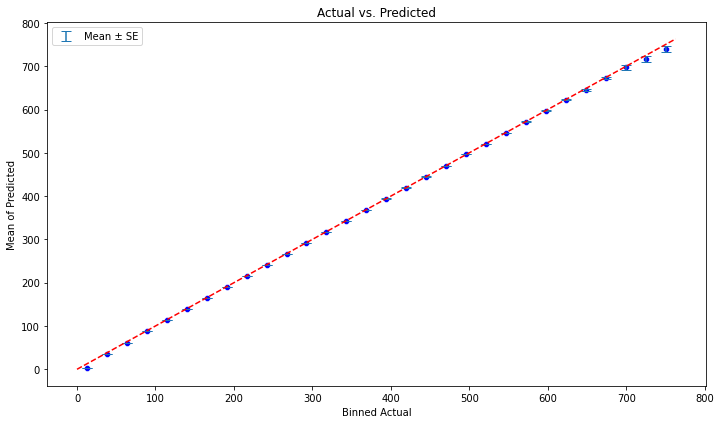

Val--------
Mean Squared Error: 0.5926169506564096
MAPE: 0.03719607312485803
R-squared: 0.9991138914505651


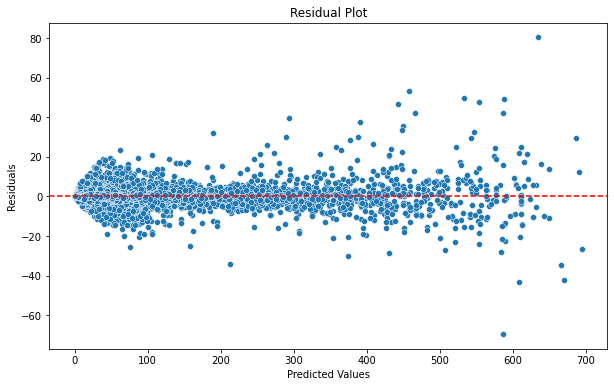

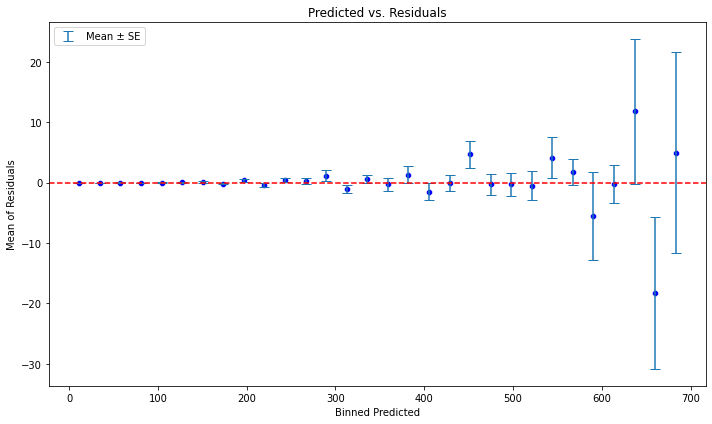

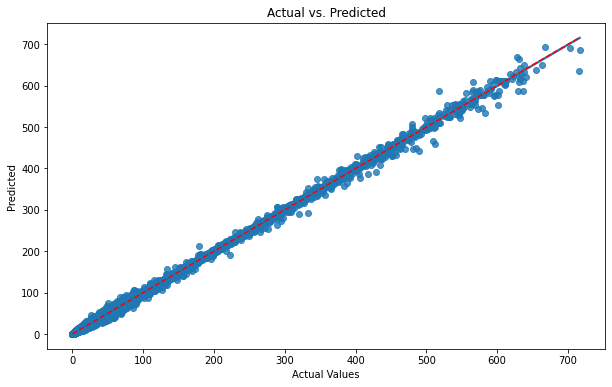

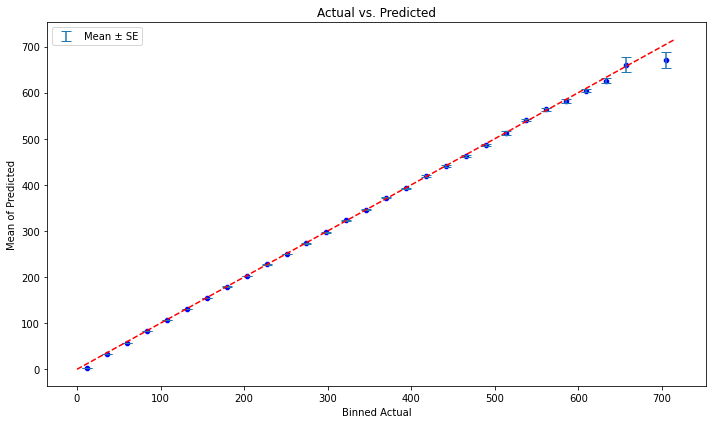

In [11]:
df_dtype = df.query("dtype_16")
X_dtype, y_dtype = df_dtype.drop(columns=["time"]), df_dtype["time"]

X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X_dtype, y_dtype, return_concat=False)
X_cv = pd.concat([X_train, X_val])
y_cv = pd.concat([y_train, y_val])

tree_model = DecisionTreeRegressor(max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=100, random_state=random_seed)
tree_model.fit(X_cv, y_cv)

run_val_pipeline(tree_model, X_cv, X_test, y_cv, y_test, bins=30)

## b16

Train--------
Mean Squared Error: 0.29901144379618017
MAPE: 0.021246166060059697
R-squared: 0.9996231016982884


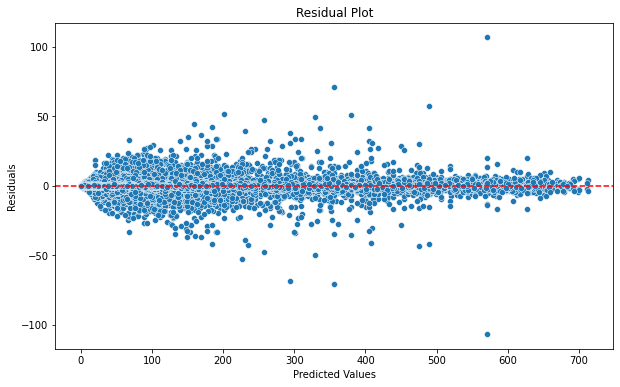

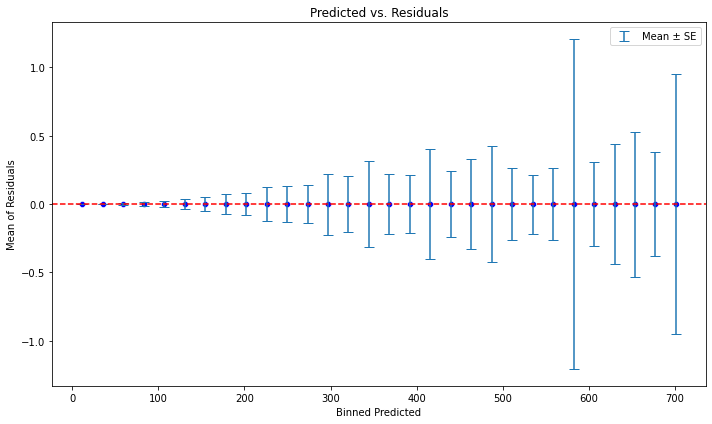

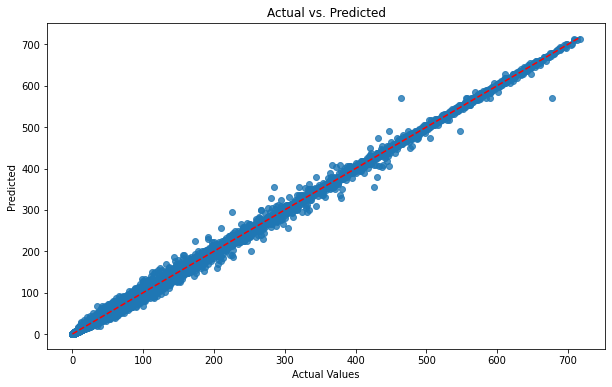

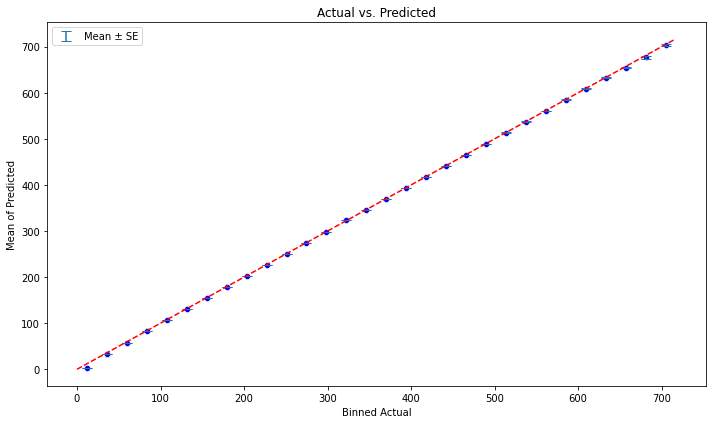

Val--------
Mean Squared Error: 1.8112330724619972
MAPE: 0.040065160435873465
R-squared: 0.997668329349355


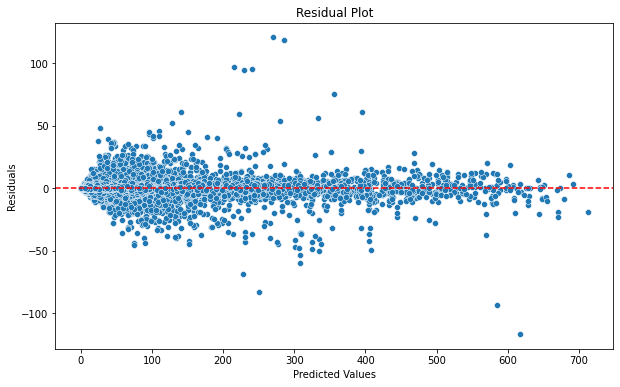

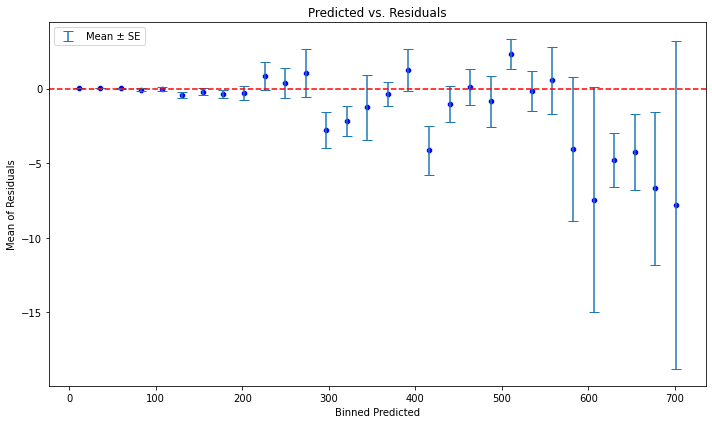

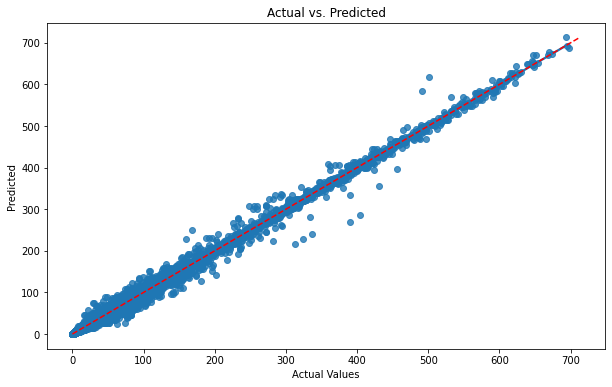

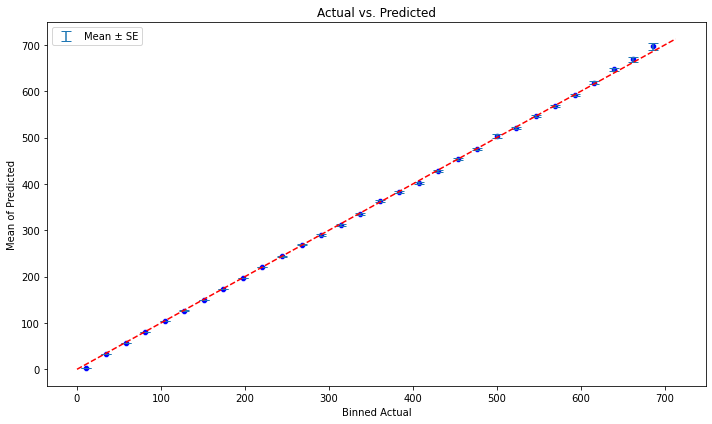

In [12]:
df_dtype = df.query("dtype_b16")
X_dtype, y_dtype = df_dtype.drop(columns=["time"]), df_dtype["time"]

X_train, X_val, X_test, y_train, y_val, y_test = get_train_test_split(X_dtype, y_dtype, return_concat=False)
X_cv = pd.concat([X_train, X_val])
y_cv = pd.concat([y_train, y_val])

tree_model = DecisionTreeRegressor(max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features=100, random_state=random_seed)
tree_model.fit(X_cv, y_cv)

run_val_pipeline(tree_model, X_cv, X_test, y_cv, y_test, bins=30)

# Save final model

In [ ]:
import joblib
joblib.dump(tree_model, '../h100_models/bmm.joblib')